<a href="https://colab.research.google.com/github/MohamedSZahran/mine/blob/master/start_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [0]:
(train_x,train_y),(test_x,test_y) = fashion_mnist.load_data()

print ('training data shape : ',train_x.shape,train_y.shape)
print ('testing data shape : ',test_x.shape,test_y.shape)

4423680/4422102 [==============================] - 2s 0us/step
training data shape :  (60000, 28, 28) (60000,)
testing data shape :  (10000, 28, 28) (10000,)


In [0]:
classes = np.unique(train_y)
nClasses = len(classes)
print ('total number of outputs : ',nClasses)
print ('output classes',classes)

total number of outputs :  10
output classes [0 1 2 3 4 5 6 7 8 9]


In [0]:
print (type(classes))

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Ground truth : 9')

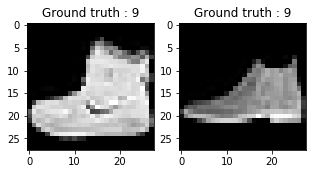

In [0]:
plt.figure(figsize = [5,5])
plt.subplot(121)
plt.imshow(train_x[0,:,:],cmap='gray')
plt.title("Ground truth : {}".format(train_y[0]))

plt.subplot(122)
plt.imshow(test_x[0,:,:],cmap='gray')
plt.title("Ground truth : {}".format(test_y[0]))

In [0]:
train_x = train_x.reshape(-1, 28,28, 1)
test_x = test_x.reshape(-1, 28,28, 1)
train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x = train_x / 255
test_x = test_x / 255

In [0]:
# Change the labels from categorical to one-hot encoding
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

# Display the change for category label using one-hot encoding
print('Original label:', train_y[0])
print('After conversion to one-hot:', train_y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


ModuleNotFoundError: ignored

In [0]:
pip install sklearn --update


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --update


In [0]:
pip install sklearn

In [0]:
from sklearn.model_selection import train_test_split
train_x,valid_x,train_label,valid_label = train_test_split(train_x,train_y_one_hot,test_size=0.2,random_state=13)

In [0]:
train_x.shape,valid_x.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
batch_size = 64
epochs = 20
num_classes = 10

In [0]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [0]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

W0711 12:33:28.063738 139934746609536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0711 12:33:28.076214 139934746609536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [0]:
fashion_train = fashion_model.fit(train_x, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_x, valid_label))

W0711 12:35:29.622002 139934746609536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0711 12:35:29.712409 139934746609536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 17s 355us/step - loss: 0.4671 - acc: 0.8298 - val_loss: 0.3184 - val_acc: 0.8856
Epoch 2/20
48000/48000 [==============================] - 11s 220us/step - loss: 0.2862 - acc: 0.8959 - val_loss: 0.2967 - val_acc: 0.8898
Epoch 3/20
48000/48000 [==============================] - 10s 215us/step - loss: 0.2367 - acc: 0.9141 - val_loss: 0.2657 - val_acc: 0.9028
Epoch 4/20
48000/48000 [==============================] - 10s 215us/step - loss: 0.2074 - acc: 0.9236 - val_loss: 0.2959 - val_acc: 0.8952
Epoch 5/20
48000/48000 [==============================] - 10s 210us/step - loss: 0.1787 - acc: 0.9336 - val_loss: 0.2344 - val_acc: 0.9167
Epoch 6/20
48000/48000 [==============================] - 10s 210us/step - loss: 0.1595 - acc: 0.9406 - val_loss: 0.2312 - val_acc: 0.9194
Epoch 7/20
48000/48000 [==============================] - 10s 209us/step - loss: 0.1377 - acc: 0.9489 - val_loss: 0.

In [0]:
test_eval = fashion_model.evaluate(test_x, test_y_one_hot, verbose=0)

In [0]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.511372352119186
Test accuracy: 0.9121


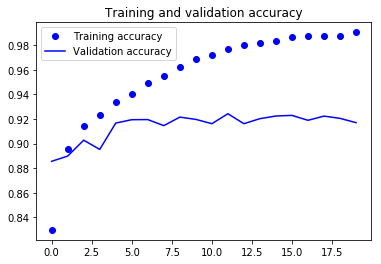

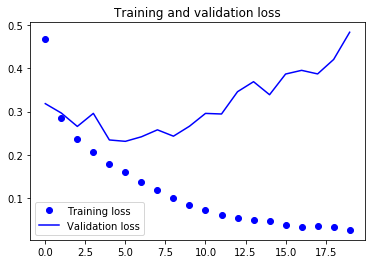

In [22]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
batch_size = 64
epochs = 20
num_classes = 10

In [24]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

W0711 13:17:43.264751 139934746609536 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [0]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [28]:
fashion_train_dropout = fashion_model.fit(train_x, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_x, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 12s 250us/step - loss: 0.6092 - acc: 0.7735 - val_loss: 0.3761 - val_acc: 0.8622
Epoch 2/20
48000/48000 [==============================] - 11s 230us/step - loss: 0.3824 - acc: 0.8589 - val_loss: 0.3183 - val_acc: 0.8818
Epoch 3/20
48000/48000 [==============================] - 11s 226us/step - loss: 0.3354 - acc: 0.8762 - val_loss: 0.3024 - val_acc: 0.8898
Epoch 4/20
48000/48000 [==============================] - 11s 226us/step - loss: 0.3047 - acc: 0.8873 - val_loss: 0.2675 - val_acc: 0.9003
Epoch 5/20
48000/48000 [==============================] - 11s 228us/step - loss: 0.2881 - acc: 0.8937 - val_loss: 0.2538 - val_acc: 0.9071
Epoch 6/20
48000/48000 [==============================] - 11s 228us/step - loss: 0.2699 - acc: 0.8989 - val_loss: 0.2379 - val_acc: 0.9106
Epoch 7/20
48000/48000 [==============================] - 11s 223us/step - loss: 0.2602 - acc: 0.9031 - val_loss: 0.

In [0]:
fashion_model.save("fashion_model_dropout.h5py")

In [31]:
test_eval = fashion_model.evaluate(test_x, test_y_one_hot, verbose=1)

10000/10000 [==============================] - 1s 110us/step


In [32]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.21926238487958907
Test accuracy: 0.9204


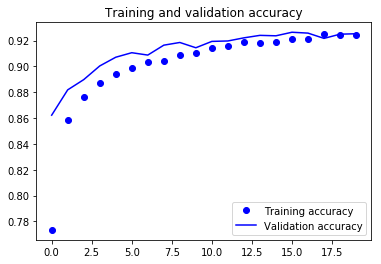

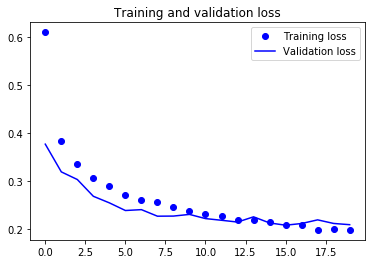

In [33]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
predicted_classes = fashion_model.predict(test_x)

In [37]:
predicted_classes.shape, test_y.shape

((10000, 10), (10000,))

In [40]:
correct = np.where(predicted_classes==test_y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_x[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_y[correct]))
    plt.tight_layout()

Found 0 correct labels


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


Found 1 incorrect labels


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


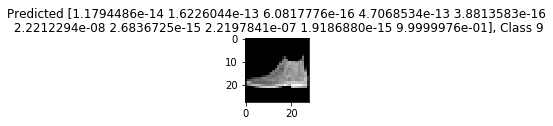

In [42]:
incorrect = np.where(predicted_classes!=test_y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_x[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_y[incorrect]))
    plt.tight_layout()

In [43]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_y, predicted_classes, target_names=target_names))

ValueError: ignored